<a href="https://colab.research.google.com/github/kalyani-pawase-pune/EDA1/blob/main/SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from matplotlib import rcParams


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
path='/content/drive/MyDrive/Hotel Bookings1111.xlsx'
df=pd.read_excel


In [ ]:
path='/content/drive/MyDrive/Hotel Bookings1111.xlsx'
df=pd.read_excel(path)

print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non

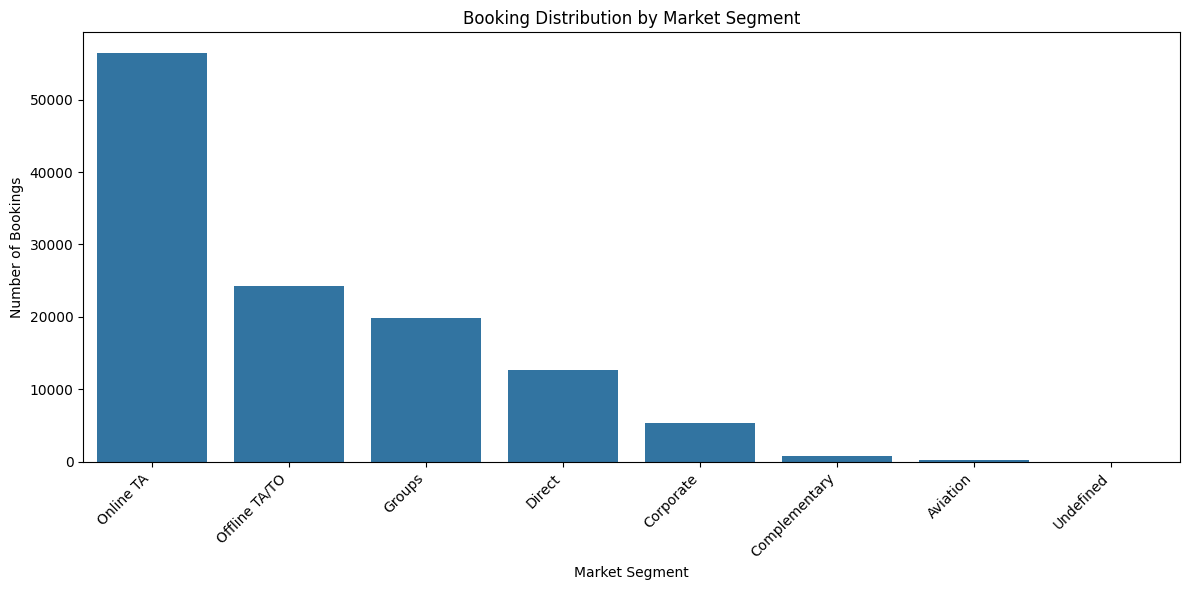

In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

df.to_sql('hotel_bookings', conn, if_exists='replace', index=False)

# SQL query to get booking distribution by market segment
query = """
SELECT market_segment, COUNT(*) AS booking_count
FROM hotel_bookings
GROUP BY market_segment
ORDER BY booking_count DESC;
"""

booking_distribution = pd.read_sql_query(query, conn)

conn.close()

plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='booking_count', data=booking_distribution)
plt.title('Booking Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

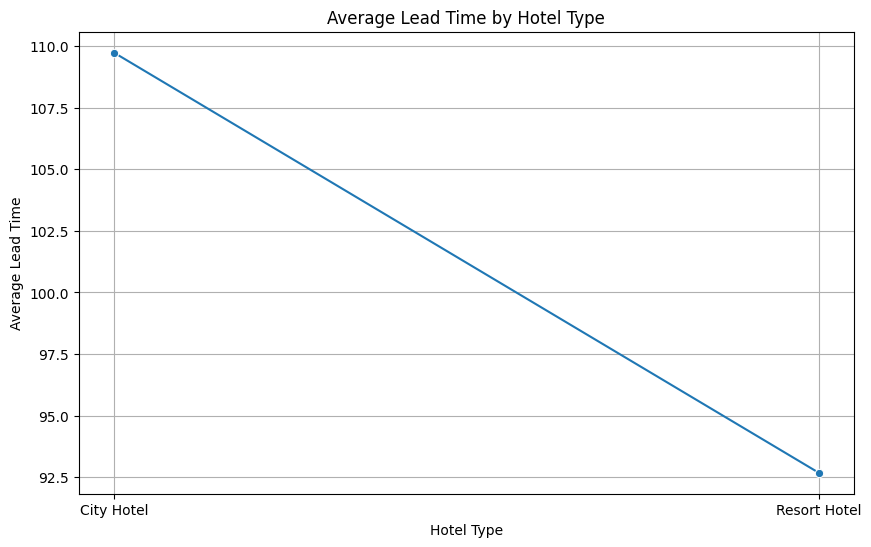

In [ ]:
#qury for the average lead time by hotel type.
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
average_lead_time = df.groupby('hotel')['lead_time'].mean().reset_index()
average_lead_time = df.groupby('hotel')['lead_time'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hotel', y='lead_time', data=average_lead_time, marker='o', linestyle='-')
plt.title('Average Lead Time by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Lead Time')
plt.grid(True)
plt.show()

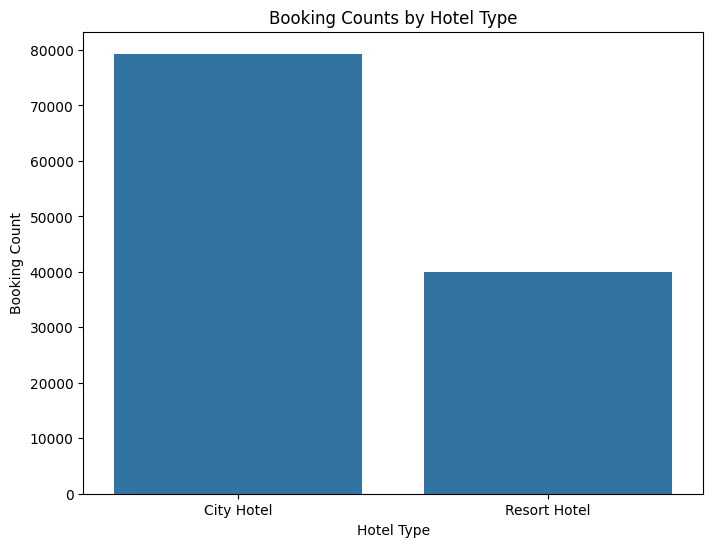

In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('hotel_bookings', conn, index=False, if_exists='replace')

# SQL query to get booking counts by hotel type
query = '''
    SELECT hotel, COUNT(*) AS booking_count
    FROM hotel_bookings
    GROUP BY hotel;
'''

# Execute the query and load the results into a DataFrame
booking_counts = pd.read_sql_query(query, conn)


# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='booking_count', data=booking_counts)
plt.title('Booking Counts by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Booking Count')
plt.show()

# Close the database connection
conn.close()

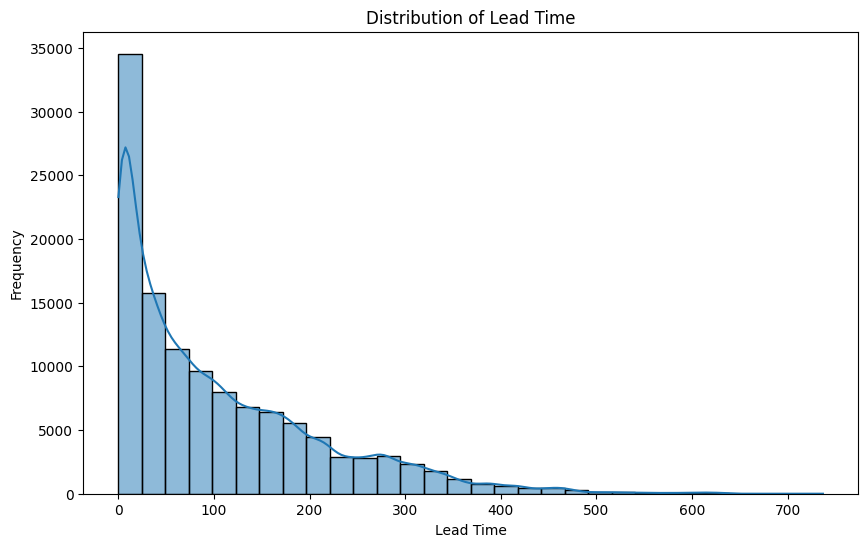

In [ ]:
# Assuming 'lead_time' is the column representing lead time
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQL table
df.to_sql('hotel_bookings', conn, index=False)

# SQL query for lead time distribution
query = """
SELECT lead_time
FROM hotel_bookings;
"""

# Execute the query and fetch the results into a DataFrame
lead_times = pd.read_sql_query(query, conn)


plt.figure(figsize=(10, 6))
sns.histplot(lead_times['lead_time'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

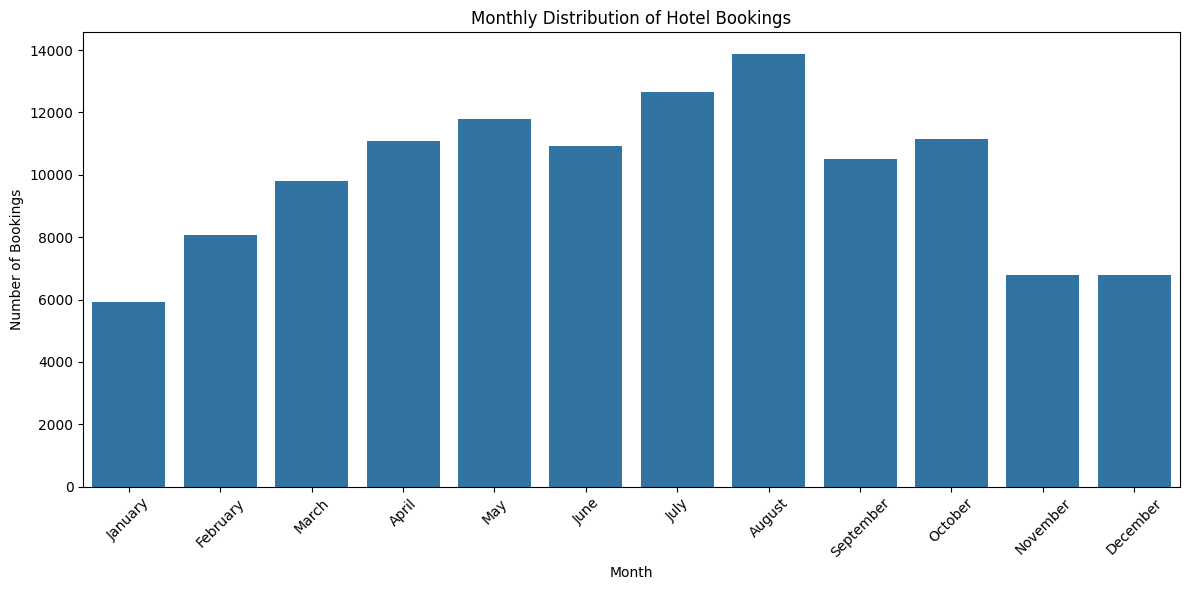

In [ ]:
# SQL query for monthly booking distribution
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('hotel_bookings', conn, index=False)

# SQL query
query = """
SELECT arrival_date_month, COUNT(*) AS booking_count
FROM hotel_bookings
GROUP BY arrival_date_month
ORDER BY CASE
    WHEN arrival_date_month = 'January' THEN 1
    WHEN arrival_date_month = 'February' THEN 2
    WHEN arrival_date_month = 'March' THEN 3
    WHEN arrival_date_month = 'April' THEN 4
    WHEN arrival_date_month = 'May' THEN 5
    WHEN arrival_date_month = 'June' THEN 6
    WHEN arrival_date_month = 'July' THEN 7
    WHEN arrival_date_month = 'August' THEN 8
    WHEN arrival_date_month = 'September' THEN 9
    WHEN arrival_date_month = 'October' THEN 10
    WHEN arrival_date_month = 'November' THEN 11
    WHEN arrival_date_month = 'December' THEN 12
    END
"""

monthly_bookings = pd.read_sql_query(query, conn)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_date_month', y='booking_count', data=monthly_bookings)
plt.title('Monthly Distribution of Hotel Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()

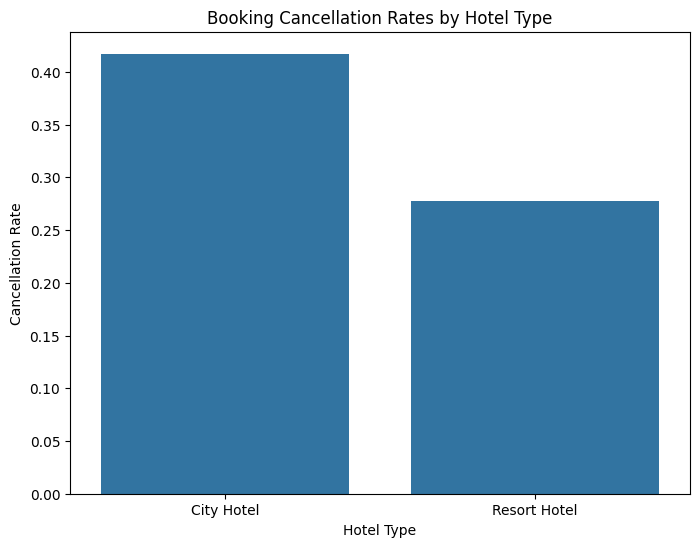

In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('hotel_bookings', conn, if_exists='replace', index=False)

# SQL query to calculate cancellation rates by hotel type
query = """
SELECT hotel, AVG(CASE WHEN is_canceled = 1 THEN 1 ELSE 0 END) AS cancellation_rate
FROM hotel_bookings
GROUP BY hotel;
"""

# Execute the query and load results into a DataFrame
cancellation_rates = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Visualization using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='cancellation_rate', data=cancellation_rates)
plt.title('Booking Cancellation Rates by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

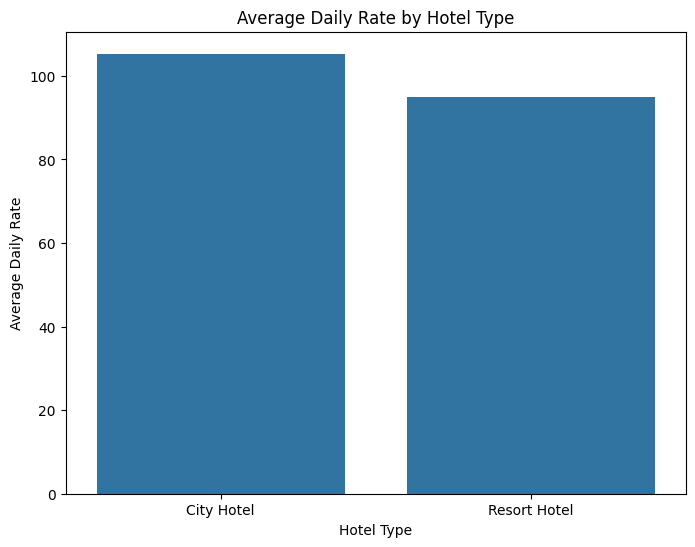

In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to the SQLite database
df.to_sql('hotel_bookings', conn, index=False)

# SQL query to calculate the average daily rate by hotel type
query = """
    SELECT hotel, AVG(adr) AS average_daily_rate
    FROM hotel_bookings
    GROUP BY hotel;
"""

# Execute the SQL query and store the result in a new DataFrame
avg_adr_by_hotel = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Create a bar plot to visualize the average daily rate by hotel type
plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='average_daily_rate', data=avg_adr_by_hotel)
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate by Hotel Type')
plt.show()

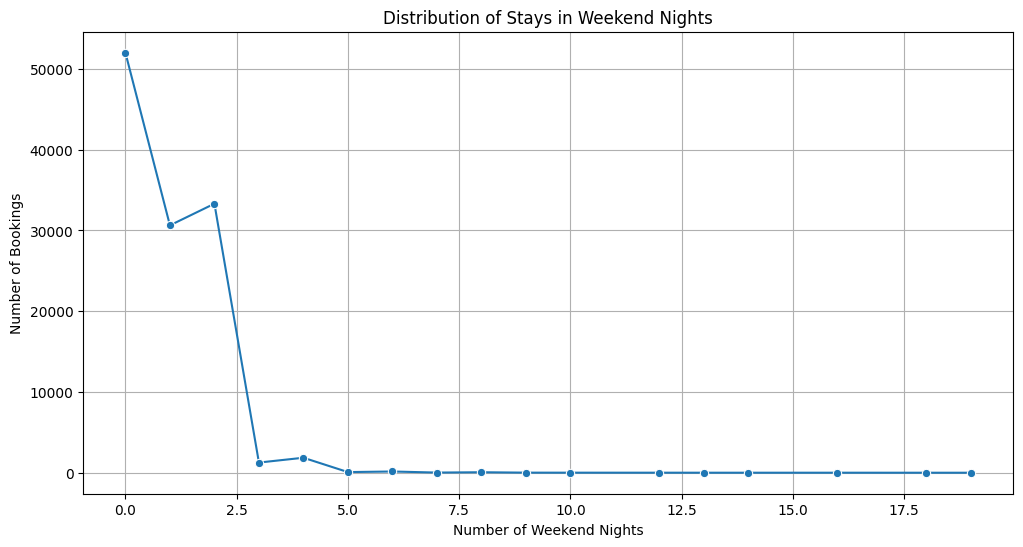

In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQL table
df.to_sql('hotel_bookings', conn, if_exists='replace', index=False)

# Execute SQL query to get the distribution of stays in weekends
weekend_stays = pd.read_sql_query("""
    SELECT stays_in_weekend_nights, COUNT(*) AS weekend_stay_count
    FROM hotel_bookings
    GROUP BY stays_in_weekend_nights
    ORDER BY stays_in_weekend_nights
""", conn)

# Close the connection
conn.close()

# Create the visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='stays_in_weekend_nights', y='weekend_stay_count', data=weekend_stays, marker='o')
plt.title('Distribution of Stays in Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

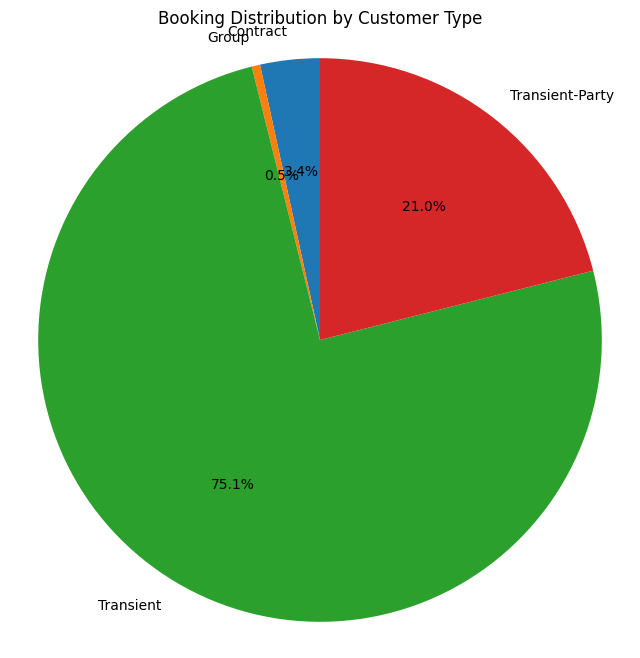

In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to an SQL table
df.to_sql('hotel_bookings', conn, index=False, if_exists='replace')

# SQL query to get booking distribution by customer type
query = """
SELECT customer_type, COUNT(*) AS booking_count
FROM hotel_bookings
GROUP BY customer_type;
"""

# Execute the query and fetch the results
booking_distribution = pd.read_sql_query(query, conn)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(booking_distribution['booking_count'], labels=booking_distribution['customer_type'], autopct='%1.1f%%', startangle=90)
plt.title('Booking Distribution by Customer Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the database connection
conn.close()

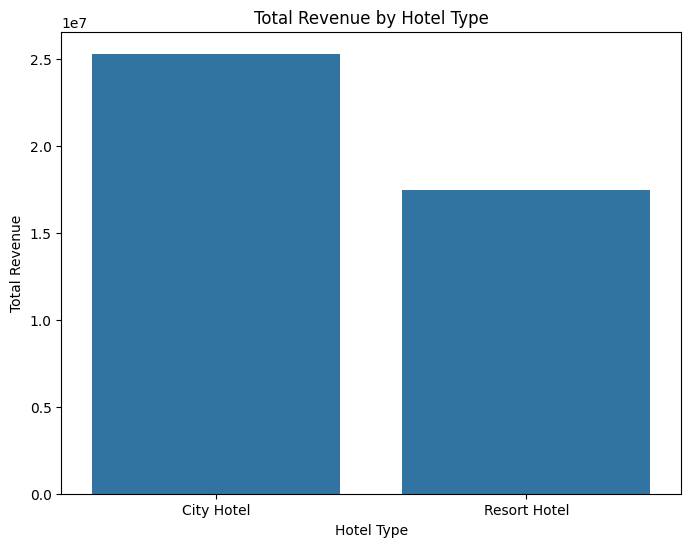

In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQL table
df.to_sql('hotel_bookings', conn, index=False, if_exists='replace')

# SQL query to calculate total revenue by hotel type
query = """
SELECT hotel, SUM(adr * (stays_in_weekend_nights + stays_in_week_nights)) AS total_revenue
FROM hotel_bookings
GROUP BY hotel;
"""

# Execute the query and load the results into a DataFrame
revenue_by_hotel = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='total_revenue', data=revenue_by_hotel)
plt.title('Total Revenue by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('hotel_bookings', conn, index=False, if_exists='replace')

# SQL query to get the top 10 lead times grouped by specified columns
query = """
SELECT lead_time, hotel, arrival_date_year, arrival_date_month, market_segment, COUNT(*) AS booking_count
FROM hotel_bookings
GROUP BY lead_time, hotel, arrival_date_year, arrival_date_month, market_segment
ORDER BY lead_time DESC
LIMIT 10;
"""

top_lead_times = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the data (without a graph)
top_lead_times

,lead_time,hotel,arrival_date_year,arrival_date_month,market_segment,booking_count
0,737,Resort Hotel,2015,July,Direct,1
1,709,Resort Hotel,2016,February,Direct,1
2,629,City Hotel,2017,March,Groups,17
3,626,City Hotel,2016,November,Groups,30
4,622,City Hotel,2017,March,Groups,17
5,615,City Hotel,2017,March,Groups,17
6,608,City Hotel,2017,March,Groups,17
7,605,City Hotel,2016,October,Groups,30
8,601,City Hotel,2017,March,Groups,17
9,594,City Hotel,2017,February,Groups,17
